# [Notebook 10] Multiclass Classification

__Building a neural network for regression with KaiTorch.__

Note: these notebooks aren't meant to showcase best practices in data processing or training neural networks, it's simply meant as a quick and easy way to showcase a working neural network 🙂

## Dataset

This wouldn't be a data science tutorial without the Iris dataset :)

#### Loading the Iris Dataset

In [1]:
from sklearn.datasets import load_iris
data = load_iris()

Imports for graphing, the Iris dataset has 4 input features and we can only visualize using 2 dimensions so we perform dimensionality reduction using PCA.

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.cm as cmx
from sklearn.decomposition import PCA

__Plotting the data__

In [3]:
def plot_iris(X, y): 

    X_pca = PCA(n_components=2).fit_transform(X)
    y = y

    plt.figure(figsize=(10,8))
    hot = plt.get_cmap('hot')
    cNorm  = colors.Normalize(vmin=0, vmax=len(y))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
    
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

    plt.title("Iris Dataset after PCA (n_components=2)")
    plt.xlabel("1st eigenvector")
    plt.ylabel("2nd eigenvector")

    plt.show()

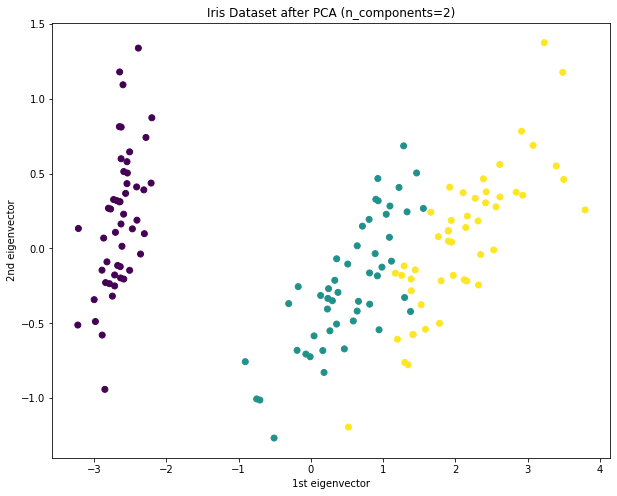

In [4]:
plot_iris(data.data, data.target)

__Making things easier for ourselves__

For the purposes of demonstration and keeping runtimes low, I'm going to scale the features of Virginica to be more separable from versicolor. 

Of course, we don't have to do this but as you probably know by now our neural network is very slow as its built using only built-in python libraries and operates on scalar values. Feel free to leave it as is and increase the network size/epochs though - should still work.

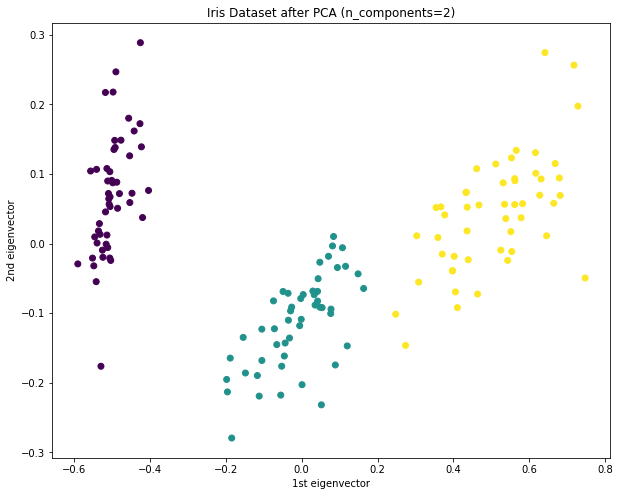

In [5]:
data['data'][-50:] = data['data'][-50:] * 1.2
data['data'] = data['data']/data['data'].max(axis=0)
plot_iris(data.data, data.target)

__One-hot encoding__

Because our labels are in the form of single integers, but our output will be the output of 3 nodes, each representing one class, we need to one-hot encode our data.

In [6]:
# kaitorch/utils.py

def as_onehot(y_pred: list):
    max_pred = max(y_pred)
    return [1 if x == max_pred else 0 for x in y_pred]

In [7]:
oh_map = {
    0: [1, 0, 0],
    1: [0, 1, 0],
    2: [0, 0, 1]
}
data['target'] = list(map(oh_map.get, data['target']))

__Train/Test split/shuffle__

In [8]:
import random

X_train = list(data['data'][:40]) + list(data['data'][50:90]) + list(data['data'][100:140])
y_train = list(data['target'][:40]) + list(data['target'][50:90]) + list(data['target'][100:140])

X_test = list(data['data'][40:50]) + list(data['data'][90:100]) + list(data['data'][140:150])
y_test = list(data['target'][40:50]) + list(data['target'][90:100]) + list(data['target'][140:150])

shuffled_order = list(range(len(X_train)))
random.shuffle(shuffled_order)

X_train = [X_train[i] for i in shuffled_order]
y_train = [y_train[i] for i in shuffled_order]

## Building a Neural Net

In [9]:
from kaitorch.models import Sequential
from kaitorch.layers import Dense, Dropout
from kaitorch.optimizers import Adam
from kaitorch.activations import LeakyReLU
from kaitorch.losses import CategoricalCrossentropy

from kaitorch.utils import as_onehot

In [10]:
model = Sequential()
model.add(Dense(20, activation=LeakyReLU(alpha=0.1), initializer='he_normal'))
model.add(Dense(20, activation=LeakyReLU(alpha=0.1), initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(12, activation=LeakyReLU(alpha=0.1), initializer='he_normal'))
model.add(Dense(12, activation=LeakyReLU(alpha=0.1), initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer=Adam(lr=0.008),
    loss=CategoricalCrossentropy()
)

In [11]:
model.build(input_size=4)
model.summary()

___________________________________________________________________________________________________________________
Layer (params)                                                           Output Shape     Params = Weights + Biases
Dense(units=20, activation=LeakyReLU(α=0.1), initializer=he_normal)      (None, 20)       100      80        20    
___________________________________________________________________________________________________________________
Dense(units=20, activation=LeakyReLU(α=0.1), initializer=he_normal)      (None, 20)       420      400       20    
___________________________________________________________________________________________________________________
Dropout(dropout_rate=0.25)                                               (None, 20)       0        0         0     
___________________________________________________________________________________________________________________
Dense(units=12, activation=LeakyReLU(α=0.1), initializer=he_normal)     

## Training a Neural Net

In [12]:
%%time
history = model.fit(X_train, y_train, epochs=30)

Epoch  30/30: 100%|████████████████████████████████████████| 120/120 [00:05<00:00, Train Loss: 0.7017]


CPU times: user 2min 30s, sys: 8.12 s, total: 2min 38s
Wall time: 2min 52s


## Results

Calculating model accuracy and visualizing class predictions of the 30 test samples.

In [13]:
y_pred = model.predict(X_test)
y_pred = [as_onehot(row) for row in y_pred]

Epoch   1/1: 100%|████████████████████████████████████████| 30/30 [00:02<00:00]


In [14]:
def print_accuracy(y_test, y_pred):
    matches = [test == pred for test, pred in zip(y_test, y_pred)]
    accuracy_dec = sum(matches)/len(matches)
    accuracy_pct = f'{100*accuracy_dec:.4}%'
    print(f'Accuracy: {accuracy_pct}')

In [15]:
print_accuracy(y_test, y_pred)

Accuracy: 93.33%


Epoch   1/1: 100%|████████████████████████████████████████| 150/150 [00:03<00:00]


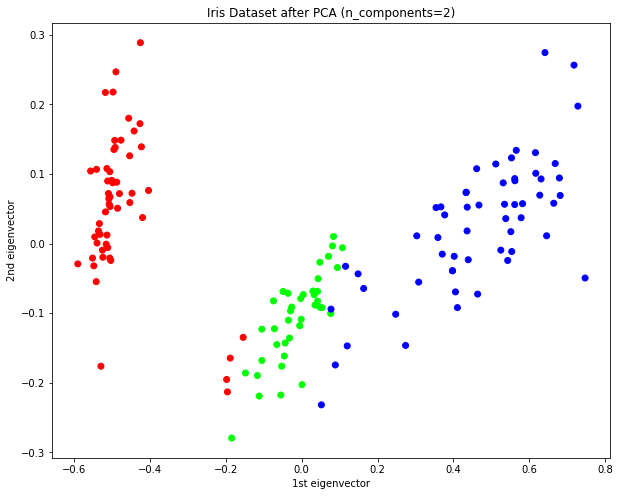

In [16]:
y_pred = model.predict(data['data'])
y_pred = [as_onehot(row) for row in y_pred]

data['target'] = y_pred
plot_iris(data['data'], y_pred)

## Tracing/Visualization

In [17]:
model.plot(filename='./imgs/multiclass_classification')